In [109]:
import pandas as pd 
import matplotlib.pyplot as plt
import os
import json
import seaborn as sns

In [39]:
os.listdir("./")

['06_extracting_dimensions.ipynb',
 '.DS_Store',
 '03_regex_extract_definitons.ipynb',
 'credentials.py',
 '01_b_elsevier_topic_search.ipynb',
 '09_extracted_categories_using_openAI.csv',
 '02_oragnizing_the_data_remove_duplicates.ipynb',
 '__pycache__',
 'full_texts',
 '04_generate_embeddings_using_openAI.ipynb',
 '10_analysing_categoreis.ipynb',
 '00_elsevier_get_abstracts_mass_download.ipynb',
 '01_elsevier_download_full_texts copy.ipynb',
 '05_word_cloud.ipynb',
 'last_rec']

In [40]:
df = pd.read_csv("09_extracted_categories_using_openAI.csv")
df

,file,title,definition,sentence_emb,prism:publicationName,cluster,non-stop-words,non_stopword_emb,cluster_non_stop_words,lemmetized_text,lemmitization_emb,lem_clusters,keyworkds,abstract,categories
0,./full_texts/10.1016/j.dcan.2023.02.017/10.101...,Editorial Board,digital twin is a simulation model of the phys...,"[-0.03444482758641243, 0.0023884980473667383, ...",Digital Communications and Networks,56,digital twin simulation model physical assets ...,"[-0.022495757788419724, 9.898456482915208e-05,...",526,"digital twin simulation model physical asset ,...","[-0.02326817624270916, 0.004337960388511419, -...",72,NaN,The Metaverse depicts a parallel digitalized w...,"{'Industry Category': 'Technology and IT', 'Su..."
1,./full_texts/10.1016/j.micpro.2023.104794/10.1...,Towards a wickless smooth–Wall aluminium food ...,Digital Twins is a transformation of technolog...,"[-0.017254427075386047, 0.006843416020274162, ...",Microprocessors and Microsystems,53,Digital Twins transformation technology new di...,"[-0.0068440246395766735, 0.002657392993569374,...",174,Digital Twins transformation technology new di...,"[-0.008395524695515633, 0.0005101208807900548,...",62,NaN,The Digital twins will duplicate the actual ob...,{'Industry Category': 'Healthcare and Medical ...
2,./full_texts/10.1016/j.micpro.2023.104794/10.1...,Towards a wickless smooth–Wall aluminium food ...,Digital Twins is a collaboration of various in...,"[-0.003896602662280202, -0.002639580052345991,...",Microprocessors and Microsystems,293,Digital Twins collaboration various industries...,"[-0.0013328647473827004, -0.015051893889904022...",282,"Digital Twins collaboration various industry ,...","[-0.0008822821546345949, -0.013520732522010803...",62,NaN,The Digital twins will duplicate the actual ob...,{'Manufacturing and Industrial Engineering': [...
3,./full_texts/10.1016/j.apmt.2018.11.003/10.101...,Editorial,digital twin is a virtual replica of the hardw...,"[-0.0317268893122673, 0.009438682347536087, -0...",Applied Materials Today,358,digital twin virtual replica hardware successf...,"[-0.020208949223160744, 0.012693223543465137, ...",322,digital twin virtual replica hardware successf...,"[-0.017557673156261444, 0.010194099508225918, ...",1,Additive manufacturing Digital twin Machine le...,The customized production of complex component...,{'Industry Category': 'Manufacturing and Indus...
4,./full_texts/10.1016/j.jmsy.2020.08.001/10.101...,Platinum-based heterogeneous nanomaterials via...,digital twin is a very significant and promisi...,"[-0.03302871435880661, 0.004698874428868294, -...",Journal of Manufacturing Systems,6,digital twin significant promising research as...,"[-0.02137889713048935, -0.0019160333322361112,...",595,digital twin significant promising research as...,"[-0.02137889713048935, -0.0019160333322361112,...",35,NaN,Predictive maintenance is one of the important...,{'Manufacturing and Industrial Engineering': [...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,./full_texts/10.1016/j.ifacol.2022.04.220/10.1...,Recent advances in wireless sensor networks fo...,Digital Twin is defined as a set of adaptive m...,"[-0.035359013825654984, 0.02325472980737686, -...",IFAC-PapersOnLine,35,Digital Twin defined set adaptive models emula...,"[-0.028353773057460785, 0.0181508157402277, -0...",196,Digital Twin defined set adaptive model emulat...,"[-0.02791772596538067, 0.017710652202367783, -...",25,NaN,The development of future Industrial Cyber-Phy...,{'Manufacturing and Industrial Engineering': [...
773,./full_texts/10.1016/j.ifacol.2022.04.220/10.1...,Recent advances in wireless sensor networks fo...,Digital Twin is a Digital Twin devoted to the ...,"[-0.033648714423179626, 0.013556599617004395, ...",IFAC-PapersOnLine,355,Digital Twin Digital Twin devoted mirroring hu...,"[-0.031256064772605896, 0.011717641726136208, ...",341,Digital Twin Digital Twin devoted mirroring hu...,"[-0.029852308332920074, 0.01311282254755497, 0...",38,NaN,The de

In [42]:
len(df["file"].unique())

514

In [48]:
import simplejson as json

def load_json(json_string):
    try:
        # Attempt to decode the JSON data
        data = json.loads(json_string)
        return data
    except json.JSONDecodeError as e:
        # Handle the JSONDecodeError
        print(f"Error decoding JSON: {e}")
        # Here, you can handle the error in any way you see fit, such as removing the problematic character
        # For example, to remove invalid control characters:
        cleaned_json_string = remove_invalid_control_characters(json_string)
        # Retry loading the JSON data
        try:
            data = json.loads(cleaned_json_string)
            return data
        except json.JSONDecodeError as e:
            # If the error persists, handle it accordingly
            print(f"Error decoding cleaned JSON: {e}")
            return None

def remove_invalid_control_characters(json_string):
    # Replace or remove invalid control characters
    cleaned_json_string = ''.join(char for char in json_string if ord(char) > 31 or char in ['\t', '\n', '\r'])
    return cleaned_json_string

# Example usage
json_string = '{"key": "value with invalid character: \x07"}'
data = load_json(json_string)
if data:
    print("Successfully loaded JSON data:", data)
else:
    print("Failed to load JSON data.")

everything = []

for i in range (len(df)):

    try:
        everything.append(load_json(df.loc[i]["categories"].replace("'", '"').lower().replace("_", " ")))
    except:
        pass
        


Error decoding JSON: Invalid control character '\x07' at: line 1 column 40 (char 39)
Successfully loaded JSON data: {'key': 'value with invalid character: '}
Error decoding JSON: Expecting property name enclosed in double quotes: line 5 column 1 (char 339)
Error decoding cleaned JSON: Expecting property name enclosed in double quotes: line 5 column 1 (char 339)
Error decoding JSON: Expecting property name enclosed in double quotes: line 3 column 1 (char 98)
Error decoding cleaned JSON: Expecting property name enclosed in double quotes: line 3 column 1 (char 98)
Error decoding JSON: Expecting property name enclosed in double quotes: line 6 column 1 (char 426)
Error decoding cleaned JSON: Expecting property name enclosed in double quotes: line 6 column 1 (char 426)
Error decoding JSON: Expecting property name enclosed in double quotes: line 7 column 1 (char 430)
Error decoding cleaned JSON: Expecting property name enclosed in double quotes: line 7 column 1 (char 430)
Error decoding JSON:

In [98]:
everything

[{'industry category': 'technology and it',
  'subcategories': ['digital twin',
   'smart manufacturing',
   'machine learning',
   'artificial intelligence',
   'internet of things (iot)',
   'edge computing',
   'cloud computing',
   'blockchain',
   'deep learning',
   'neural network',
   'artificial neural network',
   'digital transformation']},
 {'industry category': 'healthcare and medical innovation',
  'subcategories': ['healthcare application',
   'medical innovation',
   'healthcare iot',
   'digitalization in healthcare']},
 {'manufacturing and industrial engineering': ['digital twin',
   'smart manufacturing',
   'industrial internet',
   'edge computing'],
  'technology and it': ['internet of things (iot)',
   'cloud computing',
   'artificial neural network',
   'cyberphysical systems',
   'digital transformation'],
  'healthcare and medical innovation': ['healthcare application',
   'healthcare iot',
   'digitalization in healthcare'],
  'transportation and automotive 

In [91]:
all_industries = []
all_categories = []
for i in everything:
    if(isinstance(i, dict)):
        for k , v in i.items():
            print(k)
            all_industries.append(k)
            if isinstance(v, list):
                all_industries.append([k, *v])
            else:
                all_industries.append([k, v])
all_industries

industry category
subcategories
industry category
subcategories
manufacturing and industrial engineering
technology and it
healthcare and medical innovation
transportation and automotive industry
supply chain and logistics
agriculture and farm management
construction and infrastructure
energy and environmental sciences
finance and governance
retail and consumer goods
industry category
subcategories
manufacturing and industrial engineering
manufacturing and industrial engineering
technology and it
supply chain and logistics
manufacturing and industrial engineering
technology and it
healthcare and medical innovation
transportation and automotive industry
supply chain and logistics
agriculture and farm management
construction and infrastructure
energy and environmental sciences
finance and governance
retail and consumer goods
industry category
subcategories
industry category
subcategories
manufacturing and industrial engineering
technology and it
manufacturing and industrial engineering
c

['industry category',
 ['industry category', 'technology and it'],
 'subcategories',
 ['subcategories',
  'digital twin',
  'smart manufacturing',
  'machine learning',
  'artificial intelligence',
  'internet of things (iot)',
  'edge computing',
  'cloud computing',
  'blockchain',
  'deep learning',
  'neural network',
  'artificial neural network',
  'digital transformation'],
 'industry category',
 ['industry category', 'healthcare and medical innovation'],
 'subcategories',
 ['subcategories',
  'healthcare application',
  'medical innovation',
  'healthcare iot',
  'digitalization in healthcare'],
 'manufacturing and industrial engineering',
 ['manufacturing and industrial engineering',
  'digital twin',
  'smart manufacturing',
  'industrial internet',
  'edge computing'],
 'technology and it',
 ['technology and it',
  'internet of things (iot)',
  'cloud computing',
  'artificial neural network',
  'cyberphysical systems',
  'digital transformation'],
 'healthcare and medical i

In [89]:
all_categories

[]

In [77]:
d= []
for i in all_industries:
    if isinstance(i, list):
        for j in i:
            d.append(j)
    else:
        d.append(i)
len(d)

8469

In [84]:
dd = list(tuple([i.lower().replace("_", " ") for i in d]))

In [97]:

categories = everything
keysx = []
for category in categories:
    try:
        for j in category:
            if "categor" in j.lower() and not j in keysx:
                keysx.append(j)
    except:
        print(category)

keysx

None
None
None
None
None
None
None
None


['industry category',
 'subcategories',
 'industry subcategory',
 'category',
 'industrycategory',
 'subcategory']

In [125]:
# 1. convert string into json

# 2. see if the key is an actual category or just a key named :"category"

# 3. return the caterogry and subcategories
categories_keys = ['industry category',
 'subcategories',
 'industry subcategory',
 'category',
 'industrycategory',
 'subcategory']

def get_categoreis(x):
    try:
        json_obj = load_json(x.replace("'", '"').lower().replace("_", " ").replace("\n", ""))
        for k , v in json_obj.items():
            if k.lower() in categories_keys:
                return v
            else:
                return k
    except Exception as e:
        print(str(e))
        return "unkown"

sub_categories_keys = [
 'subcategories',
 'industry subcategory',
 'subcategory']
def get_sub_categoreis(x):

    try:
        json_obj = load_json(x.replace("'", '"').lower().replace("_", " ").replace("\n", ""))
        for k , v in json_obj.items():
            return v
    except Exception as e:
        print(str(e))
        return "unkown"

df["category"] = df["categories"].apply(lambda x : get_categoreis(x))
df["sub_category"] = df["categories"].apply(lambda x : get_sub_categoreis(x))
df

Error decoding JSON: Expecting property name enclosed in double quotes: line 1 column 336 (char 335)
Error decoding cleaned JSON: Expecting property name enclosed in double quotes: line 1 column 336 (char 335)
'NoneType' object has no attribute 'items'
Error decoding JSON: Expecting property name enclosed in double quotes: line 1 column 97 (char 96)
Error decoding cleaned JSON: Expecting property name enclosed in double quotes: line 1 column 97 (char 96)
'NoneType' object has no attribute 'items'
Error decoding JSON: Expecting property name enclosed in double quotes: line 1 column 422 (char 421)
Error decoding cleaned JSON: Expecting property name enclosed in double quotes: line 1 column 422 (char 421)
'NoneType' object has no attribute 'items'
Error decoding JSON: Expecting property name enclosed in double quotes: line 1 column 425 (char 424)
Error decoding cleaned JSON: Expecting property name enclosed in double quotes: line 1 column 425 (char 424)
'NoneType' object has no attribute 

,file,title,definition,sentence_emb,prism:publicationName,cluster,non-stop-words,non_stopword_emb,cluster_non_stop_words,lemmetized_text,lemmitization_emb,lem_clusters,keyworkds,abstract,categories,category,sub_category
0,./full_texts/10.1016/j.dcan.2023.02.017/10.101...,Editorial Board,digital twin is a simulation model of the phys...,"[-0.03444482758641243, 0.0023884980473667383, ...",Digital Communications and Networks,56,digital twin simulation model physical assets ...,"[-0.022495757788419724, 9.898456482915208e-05,...",526,"digital twin simulation model physical asset ,...","[-0.02326817624270916, 0.004337960388511419, -...",72,NaN,The Metaverse depicts a parallel digitalized w...,"{'Industry Category': 'Technology and IT', 'Su...",technology and it,technology and it
1,./full_texts/10.1016/j.micpro.2023.104794/10.1...,Towards a wickless smooth–Wall aluminium food ...,Digital Twins is a transformation of technolog...,"[-0.017254427075386047, 0.006843416020274162, ...",Microprocessors and Microsystems,53,Digital Twins transformation technology new di...,"[-0.0068440246395766735, 0.002657392993569374,...",174,Digital Twins transformation technology new di...,"[-0.008395524695515633, 0.0005101208807900548,...",62,NaN,The Digital twins will duplicate the actual ob...,{'Industry Category': 'Healthcare and Medical ...,healthcare and medical innovation,healthcare and medical innovation
2,./full_texts/10.1016/j.micpro.2023.104794/10.1...,Towards a wickless smooth–Wall aluminium food ...,Digital Twins is a collaboration of various in...,"[-0.003896602662280202, -0.002639580052345991,...",Microprocessors and Microsystems,293,Digital Twins collaboration various industries...,"[-0.0013328647473827004, -0.015051893889904022...",282,"Digital Twins collaboration various industry ,...","[-0.0008822821546345949, -0.013520732522010803...",62,NaN,The Digital twins will duplicate the actual ob...,{'Manufacturing and Industrial Engineering': [...,manufacturing and industrial engineering,"[digital twin, smart manufacturing, industrial..."
3,./full_texts/10.1016/j.apmt.2018.11.003/10.101...,Editorial,digital twin is a virtual replica of the hardw...,"[-0.0317268893122673, 0.009438682347536087, -0...",Applied Materials Today,358,digital twin virtual replica hardware successf...,"[-0.020208949223160744, 0.012693223543465137, ...",322,digital twin virtual replica hardware successf...,"[-0.017557673156261444, 0.010194099508225918, ...",1,Additive manufacturing Digital twin Machine le...,The customized production of complex component...,{'Industry Category': 'Manufacturing and Indus...,manufacturing and industrial engineering,manufacturing and industrial engineering
4,./full_texts/10.1016/j.jmsy.2020.08.001/10.101...,Platinum-based heterogeneous nanomaterials via...,digital twin is a very significant and promisi...,"[-0.03302871435880661, 0.004698874428868294, -...",Journal of Manufacturing Systems,6,digital twin significant promising research as...,"[-0.02137889713048935, -0.0019160333322361112,...",595,digital twin significant promising research as...,"[-0.02137889713048935, -0.0019160333322361112,...",35,NaN,Predictive maintenance is one of the important...,{'Manufacturing and Industrial Engineering': [...,manufacturing and industrial engineering,"[predictive maintenance, digital twin]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,./full_texts/10.1016/j.ifacol.2022.04.220/10.1...,Recent advances in wireless sensor networks fo...,Digital Twin is defined as a set of adaptive m...,"[-0.035359013825654984, 0.02325472980737686, -...",IFAC-PapersOnLine,35,Digital Twin defined set adaptive models emula...,"[-0.028353773057460785, 0.0181508157402277, -0...",196,Digital Twin defined set adaptive model emulat...,"[-0.02791772596538067, 0.017710652202367783, -...",25,NaN,The development of future Industrial Cyber-Phy...,{'Manufacturing and Industrial Engineering': [...,manufacturing and industrial engineering,[digital twin]
77

In [126]:
df_no_duplicates = df.drop_duplicates(subset='file', keep='first')

In [136]:
df_dummies = pd.get_dummies(df_no_duplicates['sub_category'].explode(), prefix='sub_category')
df_dummies = df_no_duplicates.join(df_dummies)
df_dummies.drop('sub_category', axis=1, inplace=True)  # Drop original list column
df_dummies


,file,title,definition,sentence_emb,prism:publicationName,cluster,non-stop-words,non_stopword_emb,cluster_non_stop_words,lemmetized_text,...,sub_category_product lifecycle,sub_category_reinforcement learning,sub_category_renewable energy,sub_category_smart manufacturing,sub_category_supply chain,sub_category_supply chain and logistics,sub_category_technology and it,sub_category_transportation and automotive industry,sub_category_unkown,sub_category_virtual reality (vr)
0,./full_texts/10.1016/j.dcan.2023.02.017/10.101...,Editorial Board,digital twin is a simulation model of the phys...,"[-0.03444482758641243, 0.0023884980473667383, ...",Digital Communications and Networks,56,digital twin simulation model physical assets ...,"[-0.022495757788419724, 9.898456482915208e-05,...",526,"digital twin simulation model physical asset ,...",...,False,False,False,False,False,False,True,False,False,False
1,./full_texts/10.1016/j.micpro.2023.104794/10.1...,Towards a wickless smooth–Wall aluminium food ...,Digital Twins is a transformation of technolog...,"[-0.017254427075386047, 0.006843416020274162, ...",Microprocessors and Microsystems,53,Digital Twins transformation technology new di...,"[-0.0068440246395766735, 0.002657392993569374,...",174,Digital Twins transformation technology new di...,...,False,False,False,False,False,False,False,False,False,False
3,./full_texts/10.1016/j.apmt.2018.11.003/10.101...,Editorial,digital twin is a virtual replica of the hardw...,"[-0.0317268893122673, 0.009438682347536087, -0...",Applied Materials Today,358,digital twin virtual replica hardware successf...,"[-0.020208949223160744, 0.012693223543465137, ...",322,digital twin virtual replica hardware successf...,...,False,False,False,False,False,False,False,False,False,False
4,./full_texts/10.1016/j.jmsy.2020.08.001/10.101...,Platinum-based heterogeneous nanomaterials via...,digital twin is a very significant and promisi...,"[-0.03302871435880661, 0.004698874428868294, -...",Journal of Manufacturing Systems,6,digital twin significant promising research as...,"[-0.02137889713048935, -0.0019160333322361112,...",595,digital twin significant promising research as...,...,False,False,False,False,False,False,False,False,False,False
4,./full_texts/10.1016/j.jmsy.2020.08.001/10.101...,Platinum-based heterogeneous nanomaterials via...,digital twin is a very significant and promisi...,"[-0.03302871435880661, 0.004698874428868294, -...",Journal of Manufacturing Systems,6,digital twin significant promising research as...,"[-0.02137889713048935, -0.0019160333322361112,...",595,digital twin significant promising research as...,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,./full_texts/10.1016/j.engappai.2023.106813/10...,The Cyber-physical E-machine Manufacturing Sys...,digital twin is a virtual replica of a physica...,"[-0.040585026144981384, -0.004295204300433397,...",Engineering Applications of Artificial Intelli...,366,"digital twin virtual replica physical asset , ...","[-0.03572925925254822, -0.008361298590898514, ...",576,"digital twin virtual replica physical asset , ...",...,False,False,False,False,False,False,False,False,False,False
775,./full_texts/10.1016/j.energy.2023.127317/10.1...,Chapter 1.18 Emergency Alert System,defined digital twin as a representation of a ...,"[-0.034567467868328094, 0.017452038824558258, ...",Energy,375,defined digital twin representation physical o...,"[-0.0249822735786438, 0.011315988376736641, -0...",646,defined digital twin representation physical o...,...,False,False,False,False,False,False,False,False,False,False
775,./full_texts/10.1016/j.energy.2023.127317/10.1...,Chapter 1.18 Emergency Alert System,defined digital twin as a representation of a ...,"[-0.034567467868328094, 0.017452038824558258, ...",Energy,375,defined digital twin representation physical o...,"[-0.0249822735786438, 0.011315988376736641, -0...",646,de

In [118]:
len(df_no_duplicates["title"].unique())

500

In [151]:
df_categories_dummified = df_dummies[df_dummies.columns[16:]]
sub_categories_occurences = {}
for i in df_categories_dummified.columns:
    sub_categories_occurences[i.replace("sub_category_", "")]=  df_categories_dummified[i].value_counts().loc[True]


In [167]:
sub_categories_occurences_df = pd.DataFrame({"category" : [k for k,v in sub_categories_occurences.items()], "count": [v for k, v in sub_categories_occurences.items()]})
sub_categories_occurences_df = sub_categories_occurences_df.sort_values("count", ascending=False).reset_index(drop=True)
sub_categories_occurences_df = sub_categories_occurences_df[3:]

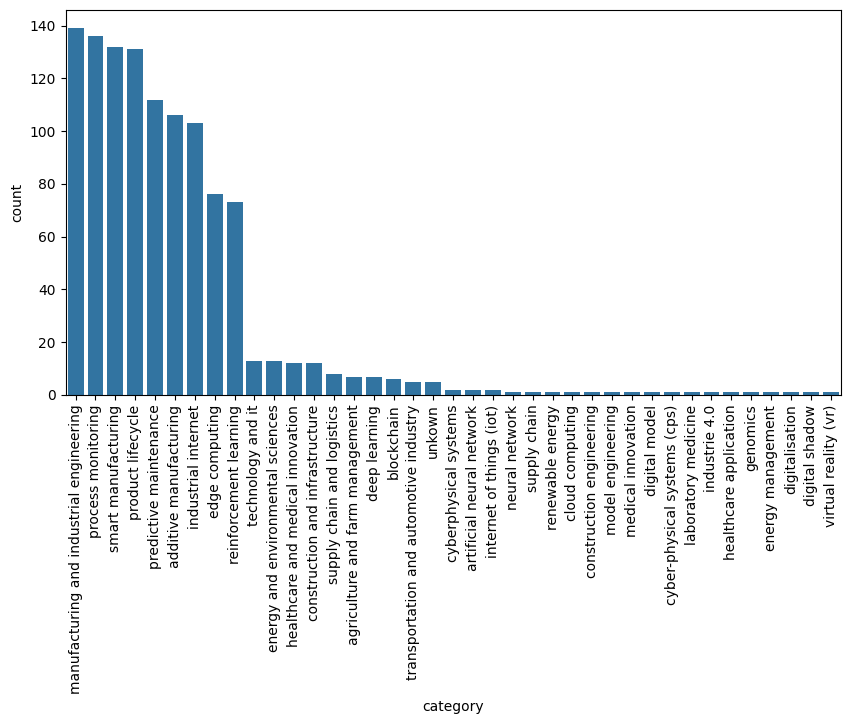

In [189]:
plt.figure(figsize=(10, 5))

sns.barplot(sub_categories_occurences_df, x="category", y="count")
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()


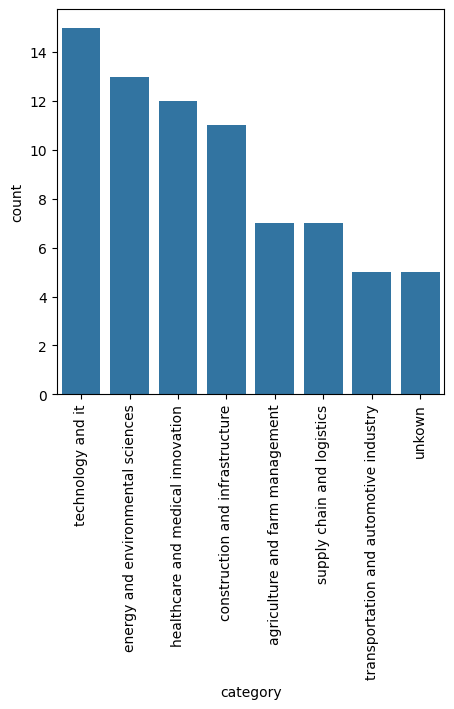

In [191]:
plt.figure(figsize=(5, 5))
sns.barplot(pd.DataFrame(df_no_duplicates["category"].value_counts()).reset_index()[1:9], x="category", y="count")
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()


In [216]:
df[df["file"].apply(lambda x  : "10.1016_j.ifacol.2022.06.058.json" in x)].loc[93][["category", "sub_category"]]

category        manufacturing and industrial engineering
sub_category                              [digital twin]
Name: 93, dtype: object

In [195]:
df_no_duplicates

,file,title,definition,sentence_emb,prism:publicationName,cluster,non-stop-words,non_stopword_emb,cluster_non_stop_words,lemmetized_text,lemmitization_emb,lem_clusters,keyworkds,abstract,categories,category,sub_category
0,./full_texts/10.1016/j.dcan.2023.02.017/10.101...,Editorial Board,digital twin is a simulation model of the phys...,"[-0.03444482758641243, 0.0023884980473667383, ...",Digital Communications and Networks,56,digital twin simulation model physical assets ...,"[-0.022495757788419724, 9.898456482915208e-05,...",526,"digital twin simulation model physical asset ,...","[-0.02326817624270916, 0.004337960388511419, -...",72,NaN,The Metaverse depicts a parallel digitalized w...,"{'Industry Category': 'Technology and IT', 'Su...",technology and it,technology and it
1,./full_texts/10.1016/j.micpro.2023.104794/10.1...,Towards a wickless smooth–Wall aluminium food ...,Digital Twins is a transformation of technolog...,"[-0.017254427075386047, 0.006843416020274162, ...",Microprocessors and Microsystems,53,Digital Twins transformation technology new di...,"[-0.0068440246395766735, 0.002657392993569374,...",174,Digital Twins transformation technology new di...,"[-0.008395524695515633, 0.0005101208807900548,...",62,NaN,The Digital twins will duplicate the actual ob...,{'Industry Category': 'Healthcare and Medical ...,healthcare and medical innovation,healthcare and medical innovation
3,./full_texts/10.1016/j.apmt.2018.11.003/10.101...,Editorial,digital twin is a virtual replica of the hardw...,"[-0.0317268893122673, 0.009438682347536087, -0...",Applied Materials Today,358,digital twin virtual replica hardware successf...,"[-0.020208949223160744, 0.012693223543465137, ...",322,digital twin virtual replica hardware successf...,"[-0.017557673156261444, 0.010194099508225918, ...",1,Additive manufacturing Digital twin Machine le...,The customized production of complex component...,{'Industry Category': 'Manufacturing and Indus...,manufacturing and industrial engineering,manufacturing and industrial engineering
4,./full_texts/10.1016/j.jmsy.2020.08.001/10.101...,Platinum-based heterogeneous nanomaterials via...,digital twin is a very significant and promisi...,"[-0.03302871435880661, 0.004698874428868294, -...",Journal of Manufacturing Systems,6,digital twin significant promising research as...,"[-0.02137889713048935, -0.0019160333322361112,...",595,digital twin significant promising research as...,"[-0.02137889713048935, -0.0019160333322361112,...",35,NaN,Predictive maintenance is one of the important...,{'Manufacturing and Industrial Engineering': [...,manufacturing and industrial engineering,"[predictive maintenance, digital twin]"
5,./full_texts/10.1016/j.procir.2021.11.160/10.1...,Third International Conference on Children's B...,Digital Twin is a complex topic developing ove...,"[-0.013382530771195889, 0.012167757377028465, ...",Procedia CIRP,302,Digital Twin complex topic developing thirty y...,"[-0.009621528908610344, 0.0040078116580843925,...",246,Digital Twin complex topic developing thirty y...,"[-0.013435671105980873, 0.0009491832461208105,...",58,NaN,The article deals with the preparation and def...,{'Manufacturing and Industrial Engineering': [...,manufacturing and industrial engineering,"[digital twin, smart manufacturing, artificial..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,./full_texts/10.1016/j.cca.2019.05.021/10.1016...,Digital twin of a combustion furnace operating...,digital twin is a virtual version of a system ...,"[-0.03334793075919151, -0.005318533629179001, ...",Clinica Chimica Acta,330,digital twin virtual version system possible t...,"[-0.022067604586482048, -0.008380554616451263,...",237,digital twin virtual version system possible t...,"[-0.022067604586482048, -0.008380554616451263,...",8,Emerging technologies Disruptive technologies ...,This review advances the discussion about the ...,{'Healthcare and Medical Innovation': ['Health...,healthcare and medical innovat

In [218]:
df.to_csv("../csv/09_extracted_categories_and_subcategories_for_each_definition.csv", index=False)